In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
indata=pd.read_csv('/content/Agriculture_commodities_dataset.csv')

In [ ]:
indata.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [ ]:
indata.shape

(62429, 11)

In [ ]:
indata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   Year             62429 non-null  int64 
 3   Month            62429 non-null  object
 4   arrivals_in_qtl  62429 non-null  int64 
 5   min_price        62429 non-null  int64 
 6   max_price        62429 non-null  int64 
 7   modal_price      62429 non-null  int64 
 8   date             62429 non-null  object
 9   district_name    62429 non-null  object
 10  state_name       62429 non-null  object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [ ]:
indata.date=pd.to_datetime(indata.date)

In [ ]:
indata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   APMC             62429 non-null  object        
 1   Commodity        62429 non-null  object        
 2   Year             62429 non-null  int64         
 3   Month            62429 non-null  object        
 4   arrivals_in_qtl  62429 non-null  int64         
 5   min_price        62429 non-null  int64         
 6   max_price        62429 non-null  int64         
 7   modal_price      62429 non-null  int64         
 8   date             62429 non-null  datetime64[ns]
 9   district_name    62429 non-null  object        
 10  state_name       62429 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 5.2+ MB


In [ ]:
indata.isnull()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
62424,False,False,False,False,False,False,False,False,False,False,False
62425,False,False,False,False,False,False,False,False,False,False,False
62426,False,False,False,False,False,False,False,False,False,False,False
62427,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
indata.isnull().sum()

,0
APMC,0
Commodity,0
Year,0
Month,0
arrivals_in_qtl,0
min_price,0
max_price,0
modal_price,0
date,0
district_name,0


In [ ]:
indata.isnull().sum().sum()

0

In [ ]:
len(indata)*0.10

6242.900000000001

Year


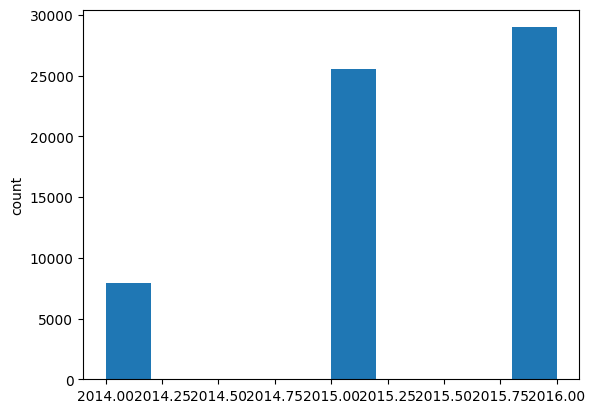

arrivals_in_qtl


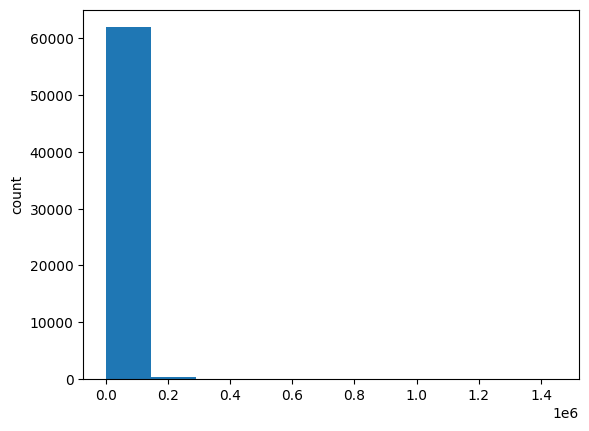

min_price


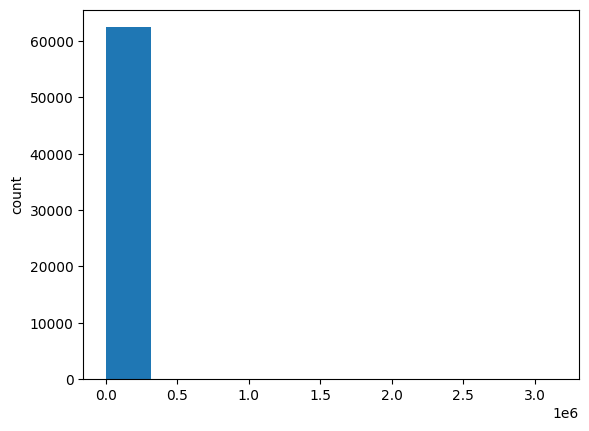

max_price


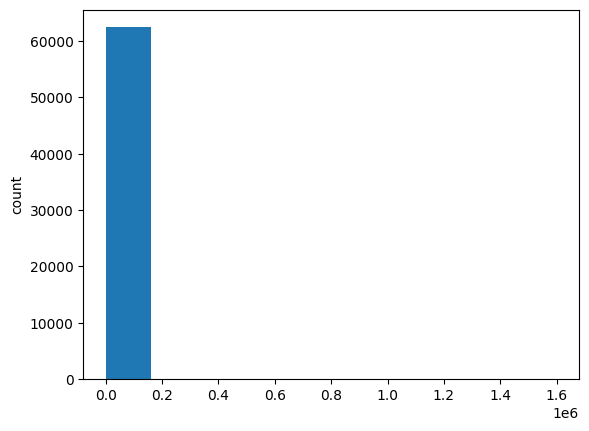

modal_price


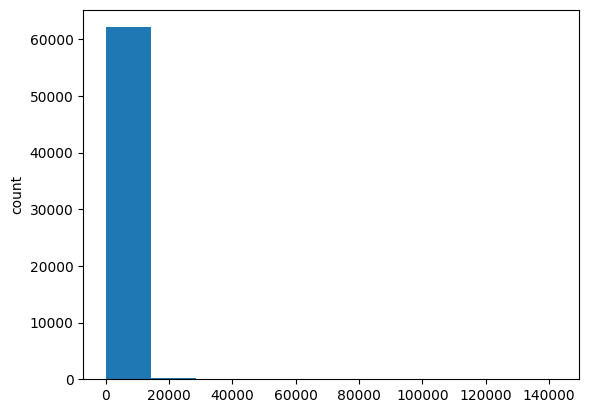

In [ ]:
for i in indata.select_dtypes(include=['int64','float64']).columns:
  plt.hist(indata[i])
  print(i)
  plt.ylabel('count')
  plt.show()

Year


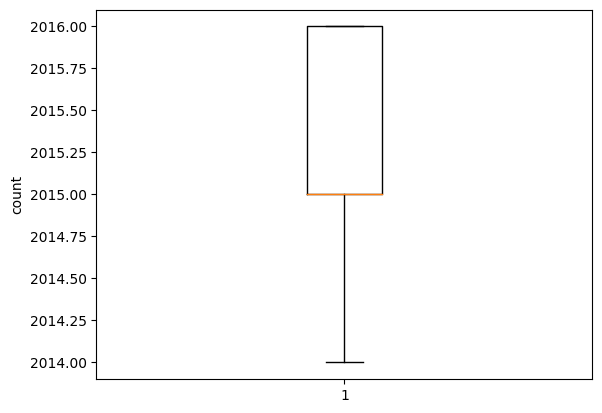

arrivals_in_qtl


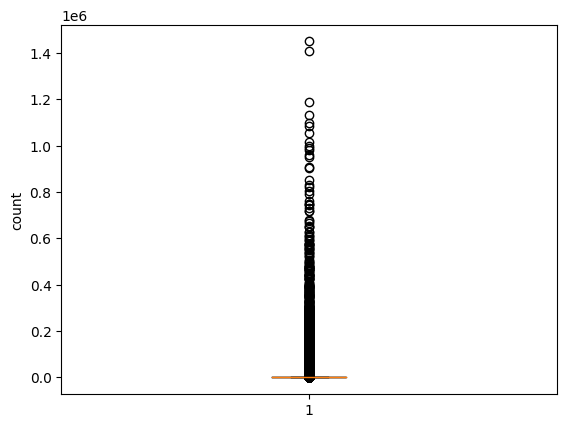

min_price


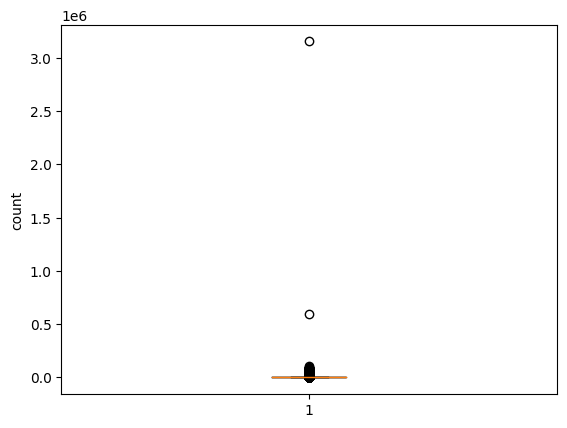

max_price


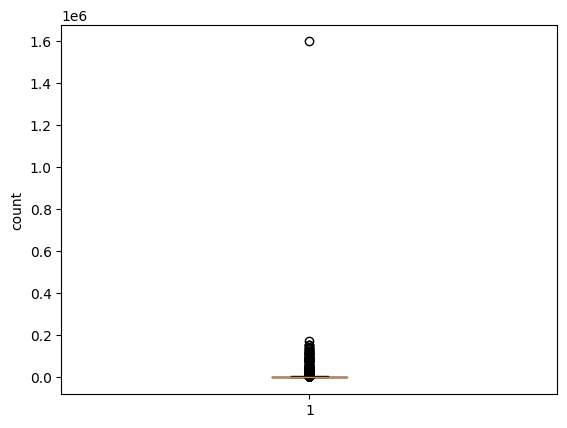

modal_price


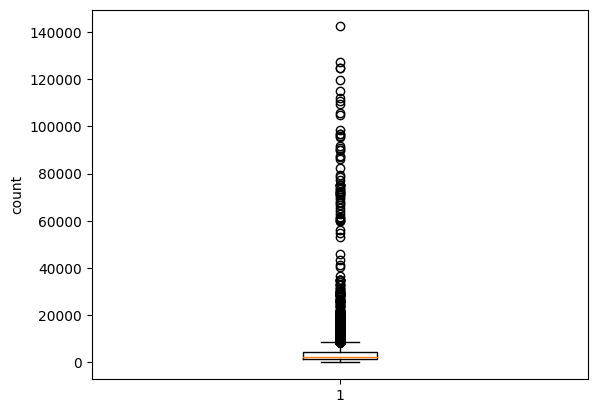

In [ ]:
for i in indata.select_dtypes(include=['int64','float64']).columns:
  plt.boxplot(indata[i])
  print(i)
  plt.ylabel('count')
  plt.show()

In [ ]:
outlierlist=['arrivals_in_qtl','min_price', 'max_price']
for i in outlierlist:
  q1=indata[i].quantile(.25)
  q3=indata[i].quantile(.75)
  iqr=q3-q1
  indata=indata[(indata[i]>q1-1.5*iqr)&(indata[i]<q3+1.5*iqr)]

In [ ]:
indata.shape

(49534, 11)

In [ ]:
indata.duplicated().sum()


0

In [ ]:
x=indata.iloc[:,:7]
x

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price
0,Ahmednagar,Bajri,2015,April,79,1406,1538
1,Ahmednagar,Bajri,2016,April,106,1788,1925
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220
5,Ahmednagar,Sorgum(Jawar),2016,April,2093,1695,2454
...,...,...,...,...,...,...,...
62424,Shrigonda,GRAM,2016,November,586,5700,6367
62425,Shrigonda,GREEN GRAM,2016,November,2,5000,5000
62426,Shrigonda,BLACK GRAM,2016,November,46,4700,6933
62427,Shrigonda,SOYBEAN,2016,November,166,2583,2708


In [ ]:
y=indata.iloc[:,-4]
y

,modal_price
0,1463
1,1875
2,1731
3,1999
5,2119
...,...
62424,6200
62425,5000
62426,6400
62427,2633


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Commodity']=le.fit_transform(x['Commodity'])
x['APMC']=le.fit_transform(x['APMC'])
x['Month']=le.fit_transform(x['Month'])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.08,random_state=999)
x_train

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price
28825,262,166,2016,4,8,1867,2333
19486,14,22,2016,4,127,1379,1512
10257,153,288,2015,0,391,1936,2463
61678,167,274,2016,9,3,3201,5851
22691,157,55,2016,0,29,161,617
...,...,...,...,...,...,...,...
6937,16,62,2016,7,37,1567,2567
20633,14,241,2016,10,3,5100,5100
57536,266,121,2016,1,1282,5842,6483
15206,60,68,2016,1,1082,700,1925


In [ ]:
y_train

,modal_price
28825,2100
19486,1512
10257,2382
61678,4751
22691,333
...,...
6937,2067
20633,5100
57536,6170
15206,1300


In [ ]:
x_test.shape

(45572, 7)

In [ ]:
x_train.shape

(3962, 7)

In [ ]:
y_train.shape

(3962,)

In [ ]:
y_test.shape

(45572,)

In [ ]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred=l_model.predict(x_test)
pred

array([ 912.03473665, 7764.54785606, 2914.14585853, ..., 6730.32820652,
        610.89654137,  198.97432861])

In [ ]:
from sklearn.metrics import *
r2score=r2_score(y_test,pred)
r2score

0.9090316413308863

In [ ]:
a=l_model.predict([[157,55,2016,0,29,161,617]])
a

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([382.11408841])